<h1 align=center style="color:#000080;">The Secret to Reducing Health Care Costs: Predicting Health Insurance Claims with Artificial Intelligence</h1>
<h3 align=center style="color:#000080;"> By Buhari Shehu</h3>

<img src="health_insurance.png" alt="insurance_claim_-image" style="width:1000px;height:500px;">

Photo created with [Canva](https://www.canva.com/design/DAFoOXz9KEw/t0VpGCQsoujxOrXxLYFRsw/edit?utm_content=DAFoOXz9KEw&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

<h2 style="color:#000080;"> Table of Contents </h2>
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#model">4. Model Selection and Evaluation</a></li>
<li><a href="#conclusions">5. Conclusions</a></li>
<li><a href="#references">6. References</a></li>
</ul>

<div id='intro'></div>

<h2 style="color:#000080;"> 1. Introduction </h2>

    
Insurance companies collect premiums from policyholders to cover the cost of claims and make profits. The companies may need more money to cover all of the claims that are filed if they fail to predict the cost of claims accurately. This can lead to financial losses for the insurance company, and it can also lead to policyholders being underinsured. Insurance claim analysis and prediction can also help insurance companies segment policyholders based on risk level, customise marketing strategies, enhance customer satisfaction and prevent fraud.
    
The goal of this project is to explore the insurance claim dataset from Kaggle and find out what influences the cost of claims made by policyholders. We will also use regression models to forecast future claims by the policyholders. The results of this project can help the insurance company to adjust the premiums and reduce expenses. The results can also inform the government about some of the main causes of health problems.

    
### 1.1 Dataset description
The dataset is publicly available on [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance). It consists of the following features:

- `age`: age of policyholders
- `sex`: gender of the policyholders
- `bmi`: a person’s weight in kilograms (or pounds) divided by the square of height in meters (or feet).[1](https://www.cdc.gov/healthyweight/assessing/bmi/index.html)
- `children`: number of children covered by the health insurance plan
- `smoker`: smoking status
- `region`: the policyholders' residential area in the US
- `charges`: individual medical costs billed by the health insurance company


### 1.2 Installing and importing dependencies
The following packages are essential to running this project successfully: `numpy, pandas, matplotlib, seaborn, sklearn, and xgboost`.


In [ ]:
# importing data analysis libraries
import numpy as np
import pandas as pd

# importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# overriding matplotlib 
sns.set()

# import datetime
import datetime as dt

# import the preprocessing classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train/test split module
from sklearn.model_selection import train_test_split

# import linear regressor
from sklearn.linear_model import LinearRegression

# import metrics
from sklearn import metrics


# import warnings
import warnings 
warnings.filterwarnings('ignore')

### 1.3 Loading the dataset

In [ ]:
# download the dataset from Kaggle
! kaggle_api -q

# unzip the dataset
! unzip -q file.zip

In [ ]:
# load the dataset
_df = pd.read_csv('')
_df.head(3)

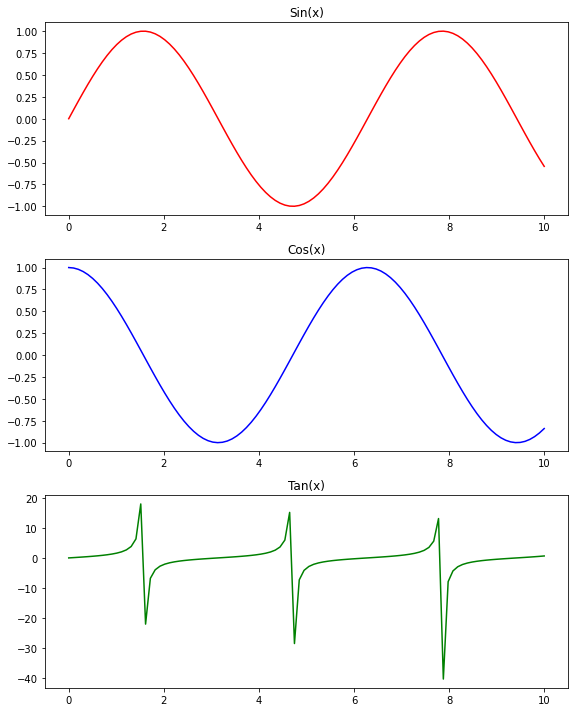

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# Create a figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Plot on the first subplot
axs[0].plot(x, y1, color='red')
axs[0].set_title('Sin(x)')

# Plot on the second subplot
axs[1].plot(x, y2, color='blue')
axs[1].set_title('Cos(x)')

# Plot on the third subplot
axs[2].plot(x, y3, color='green')
axs[2].set_title('Tan(x)')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


<div id='wrangling'></div>

## 2. Data Wrangling

**What is the size, data type and are there missing values in the dataset?**

In [ ]:
_df.info()

In [ ]:
#Aliter
df.shape

# count missing values
df.isnull().sum()

# percentage missing values
df.isnull().sum() / df.shape[0] * 100

# impute the missing values in the Age column by mean Value
df['Age'].fillna(df['Age'].mean(),inplace=True)

df['Embarked'].fillna(df['Embarked'].mode().item(),inplace=True)

#check

#rename cols
df=df.rename(columns={'Sex':'Gender','Name':'Full Name'})

# adding and modifying cols
df['last_name']=df['Full Name'].apply(lambda x: x.split(',')[0])
df['first_name']=df['Full Name'].apply(lambda x: ' '.join(x.split(',')[1:]))

#adding rows
row=dict({'Age':24,'Full Name':'Rohith','Survived':'Y'})
df=df.append(row,ignore_index=True)
df.tail()

#delete rows
df=df.drop(df.index[-1],axis=0) # Deletes last row
df.head()

#encode categorical to numerical for ml
df['Gender']=df['Gender'].map({"male":'0',"female":"1"})

In [ ]:
# select column based on data type
df.select_dtypes(include=['int64'], exclude=['str'])

# select columns based on list of col names
df[['Col1', 'Col2']]

# selecting columns where column name contains 'Average' string
df.filter(like='Average') # has regex version check it out

# .loc single column selection 
df.loc[:, 'Food' ]

# .loc multiple column selection
df.loc[:, ['State', 'Food'] ]

# .iloc single column selection 
df.iloc[:, 0]

# .iloc multiple column selection 
df.iloc[:, [0, 2, 3] ]

#*************************
# Creating the boolean mask
booleanMask = df.columns.isin(['State', 'Food'])
# saving the selected columns 
selectedCols = df.columns[booleanMask]
# selecting the desired columns
df[selectedCols]
#**************************

# slicing df.columns to access the last two columns of the dataframe

df[df.columns[-2:]]

Issue #8

Define

Code

Test

**Are there duplicates in the dataset?**

In [ ]:
# count duplicates
_df.duplicated().sum()

**Are there outliers in the dataset?**

Below are some of the methods of treating the outliers

Trimming/removing the outlier

Quantile based flooring and capping

Mean/Median imputation
[source](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

In [ ]:
def count_outliers(df):
  # select numeric columns
  df_numeric = df.select_dtypes(include=['int', 'float'])

  # get column names
  columns = df_numeric.columns

  # find the name of all columns with outliers
  outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]

  # dataframe to store the results
  outliers_df = pd.DataFrame(columns=['outlier_counts', 'outlier_percent'])

  # count the outliers and compute the percentage of outliers for each column
  for col in outlier_cols:
    outlier_count = len(find_outlier_rows(df_numeric, col))
    all_entries = len(df[col])
    outlier_percent = round(outlier_count*100/all_entries, 2)

    # store the results in the dataframe
    outliers_df.loc[col] = [outlier_count, outlier_percent]

  # return the resulting dataframe
  return outliers_df

In [ ]:
def find_outlier_rows(df, col, level='both'):
  """
  Finds the rows with outliers in a given column of a dataframe.
  
  This function takes a dataframe and a column as input, and returns the rows
  with outliers in the given column. Outliers are identified using the
  interquartile range (IQR) formula. The optional level parameter allows the
  caller to specify the level of outliers to return, i.e., lower, upper, or both.
  
  Args:
    df: The input dataframe.
    col: The name of the column to search for outliers.
    level: The level of outliers to return, i.e., 'lower', 'upper', or 'both'.
           Defaults to 'both'.
  
  Returns:
    A dataframe containing the rows with outliers in the given column.
  """
  # compute the interquartile range
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

  # compute the upper and lower bounds for identifying outliers
  lower_bound = df[col].quantile(0.25) - 1.5 * iqr
  upper_bound = df[col].quantile(0.75) + 1.5 * iqr

  # filter the rows based on the level of outliers to return
  if level == 'lower':
    return df[df[col] < lower_bound]
  elif level == 'upper':
    return df[df[col] > upper_bound]
  else:
    return df[(df[col] > upper_bound) | (df[col] < lower_bound)]


**What are the summary statistics of the dataset?**

In [ ]:
_df.describe()

<div id='eda'></div>

## 3. Exploratory Data Analysis

**Univariate**

In [ ]:
 df.skew()

In [ ]:
df.kurtosis()

In [ ]:
# histograms

df[list_numerical_feat].hist(figsize=(10,10));

In [ ]:
# density plot
df[list_numerical_feat].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

In [ ]:
# box plot
sns.boxplot(x='bmi', data=df);

In [ ]:
# violin plot
sns.violinplot(x='bmi', data=df);

In [ ]:
# line plot
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=sales.date, y=(sales.weekly_sales/1e6))
plt.xlabel('Date')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend',fontdict={'fontsize': 16, 'color':'red'}, pad=5)
plt.show()

In [ ]:
# tool tip
plt.close('all')
fig, ax = plt.subplots(1, figsize=(12,6))
# plot and labels
sc = ax.scatter(x,y)
plt.xlabel(x_name)
plt.ylabel(y_name)
# cursor grid lines
lnx = plt.plot([60,60], [0,1.5], color='black', linewidth=0.3)
lny = plt.plot([0,100], [1.5,1.5], color='black', linewidth=0.3)
lnx[0].set_linestyle('None')
lny[0].set_linestyle('None')
# annotation
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points")
annot.set_visible(False)
# xy limits
plt.xlim(x.min()*0.95, x.max()*1.05)
plt.ylim(y.min()*0.95, y.max()*1.05)
def hover(event):
    # check if event was in the axis
    if event.inaxes == ax:
        # draw lines and make sure they're visible
        lnx[0].set_data([event.xdata, event.xdata], [0, 1.5])
        lnx[0].set_linestyle('--')
        lny[0].set_data([0,100], [event.ydata, event.ydata])
        lny[0].set_linestyle('--')
        lnx[0].set_visible(True)
        lny[0].set_visible(True)
        
        # get the points contained in the event
        cont, ind = sc.contains(event)
        if cont:
            # change annotation position
            annot.xy = (event.xdata, event.ydata)
            # write the name of every point contained in the event
            annot.set_text("{}".format(', '.join([tt[n] for n in ind["ind"]])))
            annot.set_visible(True)    
        else:
            annot.set_visible(False)
    else:
        lnx[0].set_visible(False)
        lny[0].set_visible(False)
fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()

**Multivariate**

In [ ]:
df.corr()

In [ ]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# clustered bar chart


In [ ]:
# scatter plot
sns.scatterplot(x='age',y='bmi',hue='insurance_claim', data=df);

In [ ]:
# pair plot

sns.set_style("whitegrid");
sns.pairplot(df, hue="insurance_claim");
plt.show();

In [ ]:
# bubble plot
plt.figure(figsize=(12,8))
sns.scatterplot(x="bmi",
                y="claim_amount",
                size="children",
                sizes=(20,100),
                alpha=0.8,
                hue="smoker",
                data=df);

In [ ]:
# joint plot
sns.jointplot(x = 'age', y = 'bmi', data = df);
 
sns.jointplot(x = 'age', y = 'bmi', data = df, hue='insurance_claim');

In [ ]:
# line plot
plt.plot(np.arange(len(df.Y)), df.Y)
plt.title("ZAR/USD over time")
plt.xlabel("Months")
plt.ylabel("ZAR/USD")
plt.show()

In [ ]:
# 2 in 1 line plot
from matplotlib import rc
rc('mathtext', default='regular')
# Create blank figure
fig = plt.figure()


# Split figure to allow two sets of y axes
ax = fig.add_subplot(111)


# Plot the first line on its axis
ax.plot(np.arange(len(df.Y)), df.Y, '-', label = 'ZAR/USD', color='orange')


# Create second y axis and plot second line
ax2 = ax.twinx()
ax2.plot(np.arange(len(df.X)), df.X, '-', label = 'Exports (ZAR)')


# Add legends for each axis
ax.legend(loc=2)
ax2.legend(loc=9)


ax.grid()


# Set labels of axes
ax.set_xlabel("Months")
ax.set_ylabel("ZAR/USD")
ax2.set_ylabel("Exports (ZAR, millions)")
plt.show()


**Issues**

***Predictors issues***
- `linearity`: when we see that the Xs are not linear from the scatter plots of Xs and y we may need to transform the Xs and/or y with functions like log(x) and check to see if there is linearity then apply a linear function.
- `collinearity`/- `multicollinearity`: when Xs are correlated with one another. This makes it hard to determine the effect of Xs on y. Similar to collinearity. This can be checked with varience inflation factor (VIF). **0-5 good, 6-10: pay attention can remove and leave one of those, >10 remove**

If we fit a regression model to a dataset that is non-linear, it will fail to adequately capture the relationship in the data - resulting in a mathematically inappropriate model. In order to check for linearity, we can produce scatter plots of each individual predictor against the response variable. The intuition here is that we are looking for obvious linear relationships.

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. mpg".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['mpg'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)


Checking for Multicollinearity
Multicollinearity refers to the presence of strong correlation among two or more of the predictor variables in the dataset. The presence of any correlation among predictors is detrimental to model quality for two reasons:

It tends to increase the standard error;

It becomes difficult to estimate the effect of any one predictor variable on the response variable.

We will check for multicollinearity by generating pairwise scatter plots among predictors, and further, generating a correlation heatmap.

In [ ]:
# Due to the number of visuals created, this codeblock takes about one minute to run.
from seaborn import pairplot
g = pairplot(df1.drop('mpg', axis='columns'))
g.fig.set_size_inches(9,9)


***residuals issues***
- `independence/ autocorrelation` when there is correlation between **residuals**. This is not desirable. It is abd especially for time series models. This can be checked by plotting the residuals and check for rectangular patterns. Can also be checked using Durbin-Watson stat: desired value approx 2, 0-2 positive autocorrelation, 2-4 negative autocorrelation
- `homoscadacity`: constant varience among residuals for all fitted values. this makes it difficult to guage the standard deviation or error of the forecast prediction., narrow confidence interval. This can be checked by plotting residuals against predicted y. We seek a recatangular pattern not funnel one.
- `normality`: errors/residuals are generated from normal distribution: may not be necessary, check with quantile-quantile plot, shapiro will

<div id='model'></div>

## 4. Model Selection and Evaluation

In [ ]:
df1 = df.copy()

In [ ]:
# get the predictor and the predicted variables
X = _df.drop(['col'], axis=1)
y = _df['col']

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
# instantiatiating the model
lm = LinearRegression()

In [ ]:
# fitting the model
lm.fit(X_train, y_train)

#without splitting
X = df.X[:,np.newaxis] # convert shape of X from (n,) to (n,1)
lm.fit(X, y)

**Evaluating the model on train set: how well the line fits the data**

In [ ]:
# prediction
# generate values of y from x, using the linear model
y_pred = lm.predict(X_train)

In [ ]:
print('MSE:', metrics.mean_squared_error(y_train, y_pred))

In [ ]:
# Multiple MSE by N to get RSS
print("Residual sum of squares:", metrics.mean_squared_error(y_train, y_pred)*len(X))

In [ ]:
print('R_squared:', metrics.r2_score(y_train, y_pred))

In [ ]:
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, y_pred))

In [ ]:
# for slr
# plot the results
plt.scatter(X, y)  # plot the original data
plt.plot(X, gen_y, color='red')  # plot the line connecting the generated y-values
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

**Testing the model on test set**

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

In [ ]:
# evaluating MLR
from sklearn import metrics
import math

# dictionary of results
results_dict = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['disp']])),
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']])),
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

**Note**
If Mean squared error is higher on the test set than the train set, indicating poor predictive accuracy, and R-squared is lower on the test set, indicating a worse fit on the test set.

These results indicate a concept in machine learning model fitting known as overfitting. This is a phenomenon where there is:

A discrepancy between the performance of the model on train and on test sets; and
An inability of the model to generalise to data it has not seen before.
The term comes from the fact that the model fits too well, or overfits, the training data, and does not fit well, or underfits, the testing data.

In the trains to follow, we'll look at ways to improve model performance as well as prevent or mitigate overfitting.

**Note**

For big dataset we can have 3 splits: train, validation and test splits. The validation is used to check improvement in hyperparameter tuning. After we are satisfied with that we then use the test set.

For small dataset where we can't afford 3 splits we can use cross-validation like k-fold. This can be used to prevent overfitting.

**Stat model**

SK Learn is limited in terms of metrics

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
# generating string for regression

formula_str = df1.columns[0]+' ~ '+'+'.join(df1.columns[1:]); formula_str

# the model 
model=sm.ols(formula=formula_str, data=df1)
fitted = model.fit()
# print model stats
print(fitted.summary())

<div id='conclusions'></div>

## 5. Conclusions

<div id='references'></div>

## 6. References

- [Body Mass Index (BMI)](https://www.cdc.gov/healthyweight/assessing/bmi/index.html)